# FIFA 21 Dataset

### Overview of the dataset

The FIFA 21 dataset contains various attributes of football players, including their personal details, physical and skill attributes, and financial information. Each row represents a player, and columns provide information such as age, potential, value, wage, overall rating, position, and various skill metrics.

### Explanation of columns

This dataset contains numerous columns, each representing different attributes of the players. Below is an explanation of some important columns found in the dataset:

- ID: Unique identifier for each player.

- Name: The name of the player.

- Age: The age of the player in years.

- Nationality: The player's nationality.

- OVA: The overall rating of the player, representing their general skill level (0-100)

- POT: The potential rating, representing the player's potential future rating (0-100).

- Club: The club the player is currently playing for.

- Position: Player's preferred playing position on the field.

- Weight : Player's weight in lbs and kg

- Height : Player's height in inches and centimeters.

- BOV : Player's best overall rating in a particular position on the field

- Best Position : Player's best position on the field.

- Joined: Date when player joined the current club.

- Loan Date End: the date when player's loan end (if on loan)

- Value: The market value of the player.

- Wage: The weekly wage of the player.

- Finishing: Player's ability to score goals.
 
- Vision: Players ability to see and execute passes.

- Penalties: Player's ability to score penalties.

- Hits: Number of times the player has been searched for in the FIFA database.
- Stamina: The player's endurance and ability to perform throughout the match.
- Strength: The physical strength of the player.
- Skill Moves: The player's ability to perform skill moves, rated from 1 to 5.

- International Reputation: The player's reputation on the international stage, rated from 1 to 5.

- Weak Foot: The player's ability to use their non-preferred foot, rated from 1 to 5. 

- Work Rate: The player's work rate in both defense and attack (e.g., High/Medium).

### Data Source
This dataset was sourced from FIFA Index, a website dedicated to providing detailed statistics and information on FIFA game player ratings.

### Steps taken
1. Loading the data.
2. Cleaning the data.
3. Performing exploratory data analysis (EDA).
4. Visualizing the data.
5. Building a machine learning model to predict a player's finishing based on Ball control and vision.

### Some research questions to answer 
1. Distribution of player ages: How do player ages vary across different positions and nationalities?
2. Club-wise player distribution: Which clubs have the most players? How do their average OVAs and POTs compare?
3. Player value vs wage: How do player market values compare to their weekly wages?
4. Skill distribution: How are skills like Finishing, Vision, and Penalties distributed across 
5. Player development: How do players' OVAs and POTs change over time?

### Importing Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

### Loading and inspecting the data

In [49]:
#reading the csv file
pd.set_option ('display.max_columns', None)
data = pd.read_csv('fifa21 raw data v2.csv', low_memory=False)

In [3]:
#inspecting the data
data.shape

(18979, 77)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [5]:
print(data.describe())

                  ID           Age          ↓OVA           POT           BOV  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414     66.751726   
std     27141.054157      4.710520      6.968999      6.114635      6.747193   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210135.000000     21.000000     61.000000     67.000000     62.000000   
50%    232418.000000     25.000000     66.000000     71.000000     67.000000   
75%    246922.500000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy  \
count  18979.000000  18979.000000  18979.000000      18979.000000   
mean     248.938142     49.688392     45.842405         51.942726   
std       74.299428     18.131153     19.567081         17.294409   
min

### Creating a duplicate of the data

In [6]:
# creating a copy of the original data
original_data= data.copy()

In [19]:
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


### Cleaning of columns

#### 1. The Club column


In [9]:
#checking the datatype of the column
data['Club'].dtype

dtype('O')

In [10]:
# checking the unque values of the columns

data['Club'].unique()

array(['\n\n\n\nFC Barcelona', '\n\n\n\nJuventus',
       '\n\n\n\nAtlético Madrid', '\n\n\n\nManchester City',
       '\n\n\n\nParis Saint-Germain', '\n\n\n\nFC Bayern München',
       '\n\n\n\nLiverpool', '\n\n\n\nReal Madrid', '\n\n\n\nChelsea',
       '\n\n\n\nTottenham Hotspur', '\n\n\n\nInter', '\n\n\n\nNapoli',
       '\n\n\n\nBorussia Dortmund', '\n\n\n\nManchester United',
       '\n\n\n\nArsenal', '\n\n\n\nLazio', '\n\n\n\nLeicester City',
       '\n\n\n\nBorussia Mönchengladbach', '\n\n\n\nReal Sociedad',
       '\n\n\n\nAtalanta', '\n\n\n\nOlympique Lyonnais', '\n\n\n\nMilan',
       '\n\n\n\nVillarreal CF', '\n\n\n\nRB Leipzig', '\n\n\n\nCagliari',
       '\n\n\n\nAjax', '\n\n\n\nSL Benfica', '\n\n\n\nAS Monaco',
       '\n\n\n\nWolverhampton Wanderers', '\n\n\n\nEverton',
       '\n\n\n\nFiorentina', '\n\n\n\nFC Porto', '\n\n\n\nRC Celta',
       '\n\n\n\nTorino', '\n\n\n\nSevilla FC', '\n\n\n\nGrêmio',
       '\n\n\n\nReal Betis', '\n\n\n\nRoma', '\n\n\n\nNewcastle Unite

In [11]:
# Removing the leading spaces in the column
data['Club'] = data['Club'].str.strip()
data['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Atlético Madrid', 'Manchester City',
       'Paris Saint-Germain', 'FC Bayern München', 'Liverpool',
       'Real Madrid', 'Chelsea', 'Tottenham Hotspur', 'Inter', 'Napoli',
       'Borussia Dortmund', 'Manchester United', 'Arsenal', 'Lazio',
       'Leicester City', 'Borussia Mönchengladbach', 'Real Sociedad',
       'Atalanta', 'Olympique Lyonnais', 'Milan', 'Villarreal CF',
       'RB Leipzig', 'Cagliari', 'Ajax', 'SL Benfica', 'AS Monaco',
       'Wolverhampton Wanderers', 'Everton', 'Fiorentina', 'FC Porto',
       'RC Celta', 'Torino', 'Sevilla FC', 'Grêmio', 'Real Betis', 'Roma',
       'Newcastle United', 'Eintracht Frankfurt', 'Valencia CF',
       'Medipol Başakşehir FK', 'Inter Miami', 'Bayer 04 Leverkusen',
       'Levante UD', 'Crystal Palace', 'Athletic Club de Bilbao',
       'Shanghai SIPG FC', 'VfL Wolfsburg',
       'Guangzhou Evergrande Taobao FC', 'Al Shabab',
       'Olympique de Marseille', 'Los Angeles FC',
       'Beijing Sino

#### 2. Contract Column


In [12]:
data['Contract'].dtype

dtype('O')

In [13]:
data['Contract'].unique()


array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [14]:
for index, row in data.iterrows():
    if 'On Loan' in row['Contract'] or 'Free' in row['Contract']:
        print(row['Contract'])

Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Free
Free
Free
Free
Free
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Free
Free
Jun 30, 2021 On Loan
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Free
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jan 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Free
Free

Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Dec 31, 2020 On Loan
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Dec 31, 2020 On Loan
Free
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jan 1, 2021 On Loan
Jun 30, 2021 On Loan
Jan 31, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 23, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jan 31, 2021 On Loan
Jun 30, 2021 On Loan
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
May 31, 2021 On Loan
Dec 31, 2020 On Loan
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jan 1, 2021 On Loan
Free
Jun 30, 2021 On Loan
Fr

Jan 31, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2022 On Loan
Jun 30, 2021 On Loan
Jun 30, 2022 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Jun 23, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jan 31, 2021 On Loan
Jun 30, 2021 On Loan
Nov 27, 2021 On 

In [17]:
# Extracting contract start date, end date and duration
def extract_contract_info(contract):
    if contract == 'Free' or 'On Loan' in contract:
        start_date = np.nan
        end_date = np.nan
        contract_length = 0
    else:
        start_date, end_date = contract.split(' ~ ')
        start_year = int(start_date[:4])
        end_year = int(end_date[:4])
        contract_length = end_year - start_year
    return start_date, end_date, contract_length

# Apply the function to the contract column and create new columns

new_cols = ['Contract Start', 'Contract End', 'Contract Length(years)']
new_data = data['Contract'].apply(lambda x: pd.Series(extract_contract_info(x)))

for i in range(len(new_cols)):
    data.insert(loc=data.columns.get_loc('Contract')+1+i, column= new_cols[i], value = new_data[i])
        


In [18]:
data[['Contract','Contract Start', 'Contract End', 'Contract Length(years)']].sample(5)

,Contract,Contract Start,Contract End,Contract Length(years)
1974,2009 ~ 2021,2009,2021,12.0
8044,2018 ~ 2021,2018,2021,3.0
17220,Free,NaN,NaN,0.0
6452,2020 ~ 2022,2020,2022,2.0
6754,2020 ~ 2021,2020,2021,1.0


In [19]:
# Creating a new column for Contract Status or categories

def contract_status(contract):
    if contract == "Free":
        return 'Free'
    elif 'On Loan' in contract:
        return 'On Loan'
    else:
        return 'Contract'
    
# Adding the contract status column to the dataframe
data.insert(data.columns.get_loc('Contract Length(years)')+1, 'Contract Status', data['Contract'].apply(contract_status))
data.sample(3)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
511,210896,M. Sanson,Morgan Sanson,https://cdn.sofifa.com/players/210/896/21_60.png,http://sofifa.com/player/210896/morgan-sanson/...,France,25,79,82,Olympique de Marseille,...,High,High,2 ★,73,75,79,78,72,78,106
16346,255854,Pacheco,Jon Pacheco Dozagarat,https://cdn.sofifa.com/players/255/854/21_60.png,http://sofifa.com/player/255854/jon-pacheco-do...,Spain,19,58,75,Real Sociedad,...,Low,Medium,1 ★,56,22,36,32,59,58,9
13693,235700,J. Green,Jordan Green,https://cdn.sofifa.com/players/235/700/21_60.png,http://sofifa.com/player/235700/jordan-green/2...,England,25,62,64,Southend United,...,Medium,Medium,1 ★,88,54,55,64,33,52,7


In [20]:
data[['Contract','Contract Start', 'Contract End', 'Contract Length(years)', 'Contract Status']].sample(30)


,Contract,Contract Start,Contract End,Contract Length(years),Contract Status
3018,2020 ~ 2022,2020,2022,2.0,Contract
10501,2018 ~ 2021,2018,2021,3.0,Contract
4256,2017 ~ 2021,2017,2021,4.0,Contract
9082,2018 ~ 2021,2018,2021,3.0,Contract
17265,2019 ~ 2022,2019,2022,3.0,Contract
6390,2019 ~ 2023,2019,2023,4.0,Contract
12845,"Jan 31, 2021 On Loan",NaN,NaN,0.0,On Loan
7397,2020 ~ 2020,2020,2020,0.0,Contract
8971,2019 ~ 2023,2019,2023,4.0,Contract
13249,2020 ~ 2022,2020,2022,2.0,Contract


#### 3. Height column


In [21]:
data['Height'].dtype


dtype('O')

In [22]:
data['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [23]:
# Converting height into centimetres

def height_conversion(height):
    if "cm" in height:
        return int(height.strip("cm"))
    else:
        feet, inches = height.split("'")
        total_inches = int(feet)*12 + int(inches.strip('"'))
        return round(total_inches * 2.54)
    
#Applying the function to the height column
data['Height'] = data['Height'].apply(height_conversion)
data['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [26]:
# Renaming the height column to reflect the units
data = data.rename(columns={'Height':"Height(cm)"})
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


#### 4. Weight Column

In [27]:
data['Weight'].dtype



dtype('O')

In [28]:
data['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [29]:
# Converting the weight into kilograms

def weight_conversion(weight):
    if "kg" in weight:
        return int(weight.strip("kg"))
    else:
        pounds = int(weight.strip("lbs"))
        return round(pounds/2.205)
    
# Applying the function the weight column

data['Weight'] = data['Weight'].apply(weight_conversion)
data['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

In [30]:
# Renaming the weight column to reflect the units

data = data.rename(columns={'Weight':"Weight(kg)"})
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


#### 5. Loan Date End Column




In [32]:
data['Loan Date End'].dtype



dtype('O')

In [31]:
data['Loan Date End'].unique()

array([nan, '30-Jun-21', '31-Dec-20', '30-Jan-21', '30-Jun-22',
       '31-May-21', '05-Jul-21', '31-Dec-21', '01-Jul-21', '01-Jan-21',
       '31-Aug-21', '31-Jan-21', '30-Dec-21', '23-Jun-21', '03-Jan-21',
       '27-Nov-21', '17-Jan-21', '30-Jun-23', '31-Jul-21', '22-Nov-20',
       '31-May-22', '30-Dec-20', '04-Jan-21', '30-Nov-20', '01-Aug-21'],
      dtype=object)

#### 6. W/F Column (Weak Foot Rating)

In [38]:
data['W/F'].dtype


dtype('O')

In [37]:
data['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [43]:
# removing the starsfrom the column
data['W/F'] = data['W/F'].str.replace("★",'').str.strip().astype(int)

data['W/F'].unique()


array([4, 3, 5, 2, 1])

#### 7. Hits Column



In [46]:
data['Hits'].dtype

dtype('O')

In [47]:
data['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

#### Converting the 'K's in this column to thousands will not provide an accurate representation of the figures, as they have already been rounded to the nearest thousand. Therefore, it is advisable to leave the column as is.

#### Wage Column

In [20]:
# Converting 'Wage' and 'Value' columns to numeric by removing any non-numeric characters (e.g., '€', 'K')
data['Wage'] = data['Wage'].replace('[\€,]', '', regex=True).replace('K', '000', regex=True).astype(float)
data['Value'] = data['Value'].replace('[\€,M]', '', regex=True).replace('K', '000', regex=True).replace('B', '000000', regex=True).astype(float)

In [21]:
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,103.5,560000.0,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,63.0,220000.0,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,120.0,125000.0,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,129.0,370000.0,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,132.0,270000.0,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [57]:
# Ensuring column names are stripped of any leading or trailing spaces
data.columns = data.columns.str.strip()

# Renaming the column with the down arrow
data.rename(columns={'↓OVA': 'OVA'}, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   OVA               18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

## Exploring and Visualizing the data

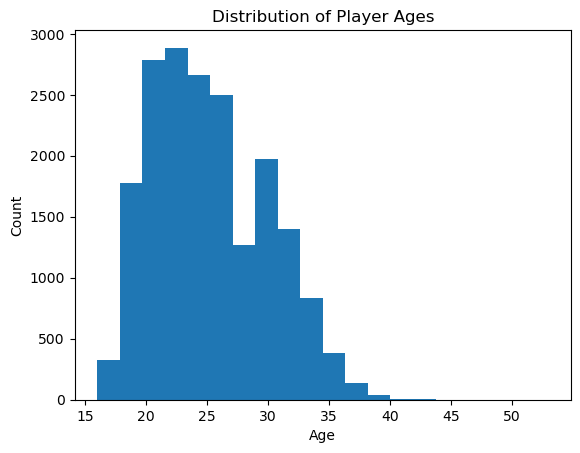

In [48]:
plt.hist(data['Age'], bins=20)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


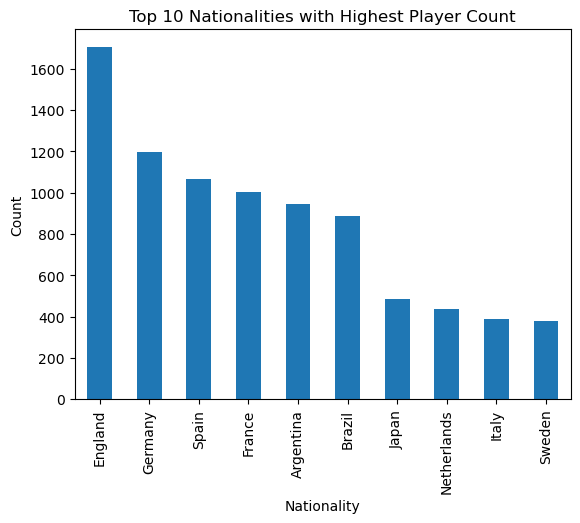

In [51]:
#Top 10 Nationalities with Highest Player Count
top_10_nationalities = data['Nationality'].value_counts().nlargest(10)

top_10_nationalities.plot(kind='bar')
plt.title('Top 10 Nationalities with Highest Player Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()



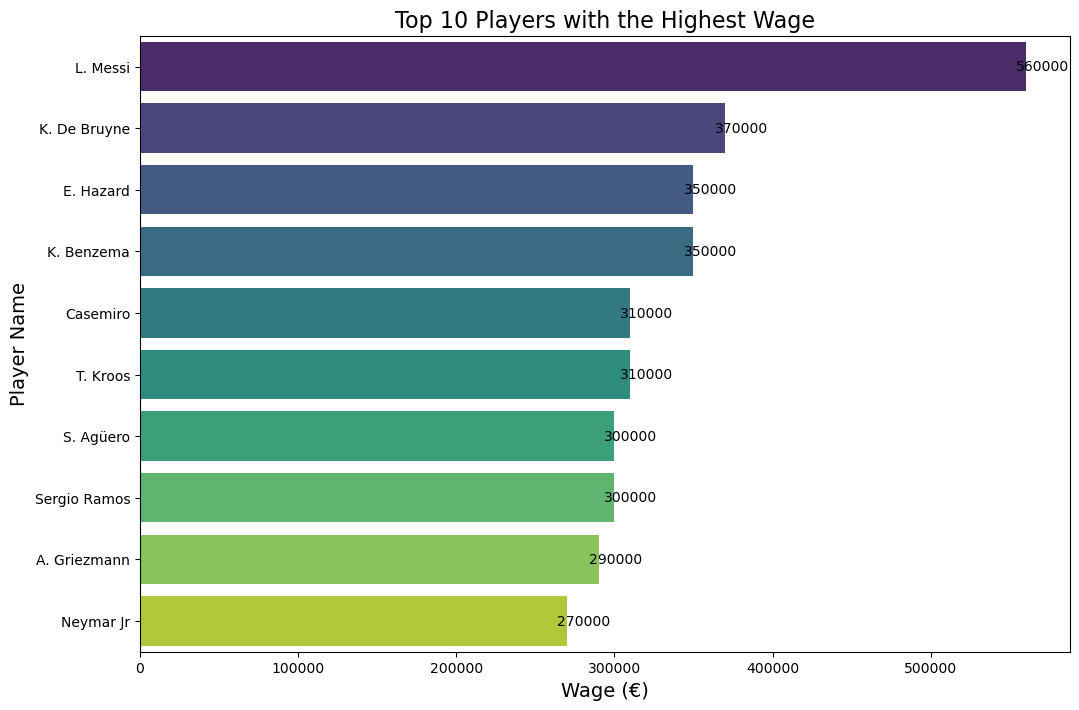

In [36]:
# Sort the dataset by 'Wage' in descending order and select the top 10 players
top_10_wage = data.sort_values(by='Wage', ascending=False).head(10)

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
ax = sns.barplot(x='Wage', y='Name', data=top_10_wage, palette='viridis')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (12, 0), 
                textcoords = 'offset points')

# Add title and labels
plt.title('Top 10 Players with the Highest Wage', fontsize=16)
plt.xlabel('Wage (€)', fontsize=14)
plt.ylabel('Player Name', fontsize=14)

# Display the plot
plt.show()



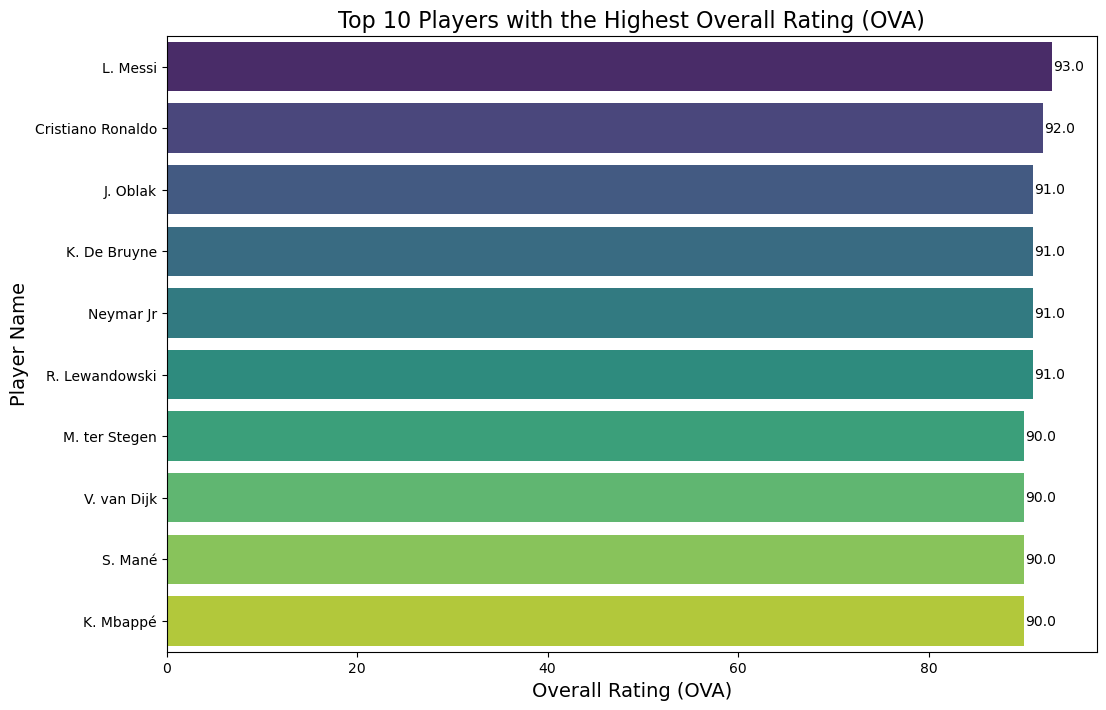

In [35]:
# Sort the dataset by 'OVA' in descending order and select the top 10 players
top_10_ova = data.sort_values(by='OVA', ascending=False).head(10)

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
ax = sns.barplot(x='OVA', y='Name', data=top_10_ova, palette='viridis')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (12, 0), 
                textcoords = 'offset points')

# Add title and labels
plt.title('Top 10 Players with the Highest Overall Rating (OVA)', fontsize=16)
plt.xlabel('Overall Rating (OVA)', fontsize=14)
plt.ylabel('Player Name', fontsize=14)

# Display the plot
plt.show()

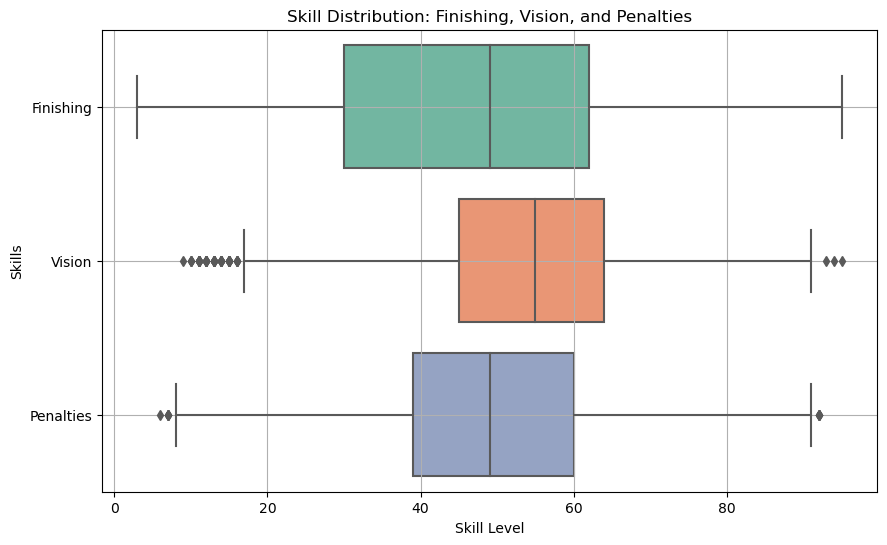

In [55]:
# Selecting relevant columns
skills = ['Finishing', 'Vision', 'Penalties']
data_skills = data[skills]

# Using Seaborn to create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_skills, orient='h', palette='Set2')
plt.title('Skill Distribution: Finishing, Vision, and Penalties')
plt.xlabel('Skill Level')
plt.ylabel('Skills')
plt.grid(True)
plt.show()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        18979 non-null  int64  
 1   OVA        18979 non-null  int64  
 2   POT        18979 non-null  int64  
 3   Value      18979 non-null  float64
 4   Wage       18979 non-null  float64
 5   Finishing  18979 non-null  int64  
 6   Crossing   18979 non-null  int64  
 7   Wage       18979 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [53]:
# Print all columns in your DataFrame
print(data.columns)

# Check if all required columns exist
required_columns = [ 'Ball Control', 'Vision', 'Finishing']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Proceed with selecting and processing the data
    data_selected = data[required_columns]
    X = data_selected[[ 'Ball Control', 'Vision']]
    y = data_selected['Finishing']


# Splitting data into features (X) and target variable (y)
X = data_selected[[ 'Ball Control', 'Vision']]
y = data_selected['Finishing']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")










Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 